# 0.0 Solution Planning (IOT)

## Input 
1. Business Issue
    - Select the most valuable customers for a loyalty program.
2. Dataset
    - E-commerce sels online, during one year period.

## Output
1. Recommendation list of customers the should be in Loyalty program.
- List: client_id | is_insider

2. Report with business answers:
- 1. Who are eligible to participate the Insiders Program?
- 2. How many customers will be part of the group?
- 3. What are the mainly characteristics of there customers?
- 4. What is the % of revenue coming of these customers?
- 5. What's the revenue expectation for this group next month?
- 6. What are the conditions for someone to be eligible for insiders?
- 7. What are the conditions for someone to be removed from insiders?
- 8. What is the guarantee that the Insiders program is best than the remaining base?
- 9. What actions the marketing team can do for increasing the revenue?

## Tasks

1. Report with business answers:
- 1. Who are eligible to participate the Insiders Program?
    - What is being eligible? What are the most valuable customers?
        - Cost:
        - Buy Experience
        - Basket Size
        - High buy likely
        - Low devolution rate.
- 2. How many customers will be part of the group?
    - Total number of customers
    - % of Insiders Group
- 3. What are the mainly characteristics of there customers?
    - Write customers characteristics:
        - Age
        - Localization
    - Write consuming characteristics:
        - Clustering Features

- 4. What is the % of revenue coming of these customers?
    - Total Revenue vs Insiders Group Revenue
- 5. What's the revenue expectation for this group next month?
    - Insiders Group LTV
    - Cohort Analysis 

- 6. What are the conditions for someone to be eligible for insiders?
    - Define the Insiders update periodicity  
    - The customers needs to be lookalike someone of the Insiders group.


- 7. What are the conditions for someone to be removed from insiders?
    - Define the Insiders update periodicity  
    - The customers needs to be unlookalike someone of the Insiders group.   


- 8. What is the guarantee that the Insiders program is best than the remaining base?
    - A/B test
    - A/B Bayesian test
    - Hypotesis Test


- 9. What actions the marketing team can do for increasing the revenue?
    - Discount
    - New products
    - New employees

## Solutions Benchmark
1. Desk Research

## 0.1 Import libraries

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn import cluster as c 
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.gridspec as gridspec
from plotly import express as px


plt.rcParams["figure.figsize"] = (15,8)


## 0.2 Load dataset

In [3]:
df0 = pd.read_csv('data.csv', encoding='latin1')
df0.columns=df0.columns.str.lower()
df0.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


# 1.0 Data Description

In [4]:
df1=df0.copy()

## 1.1 data dimensions

In [5]:
df1.shape

(541909, 8)

## 1.2 N/As treatment

In [6]:
df1.isna().sum()/len(df1)

invoiceno      0.000000
stockcode      0.000000
description    0.002683
quantity       0.000000
invoicedate    0.000000
unitprice      0.000000
customerid     0.249267
country        0.000000
dtype: float64

In [7]:
# remove na
df1 = df1.dropna( subset=['description','customerid'])
print( 1-(len(df1)/len(df0)))

0.24926694334288602


In [8]:
df1.shape

(406829, 8)

In [9]:
df1.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

## 1.3 data types treatment

In [10]:
df1.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

In [11]:
df1.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [12]:
df1['invoicedate']=df1['invoicedate'].str.split(expand=True)[0]
df1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


In [13]:
#invoice date
df1['invoicedate'] = pd.to_datetime( df1['invoicedate'], format="%m/%d/%Y",errors='coerce')

df1['customerid']=df1['customerid'].astype(int)
df1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [14]:
df1.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid              int32
country                object
dtype: object

## 1.4 descriptive statistics

# 2.0 Feature Engineering

In [15]:
df2=df1.copy()

## 2.1 Feature Creation

In [36]:
# data reference
df_ref=df2[['customerid']].drop_duplicates(ignore_index=True)
df_ref.head()

,customerid
0,17850
1,13047
2,12583
3,13748
4,15100


In [37]:
# Gross Revenue ( Quantity * Price)
df2['grossrevenue']=df2['quantity'] * df2['unitprice']

# Monetary
df_monetary=df2[['customerid','grossrevenue']].groupby(['customerid']).sum().reset_index()
df_ref= df_ref.merge(df_monetary, on='customerid', how='left')


#Recency - Last day purchase
df_recency=df2[['customerid', 'invoicedate']].groupby('customerid').max().reset_index()
df_recency['recencydays'] = (df2['invoicedate'].max()- df_recency['invoicedate']).dt.days
df_recency= df_recency[['customerid','recencydays']].copy()

df_ref= df_ref.merge(df_recency, on='customerid',how='left')

# Frequency
df_freq=df2[['customerid','invoiceno']].drop_duplicates().groupby('customerid').count().reset_index()
df_ref=df_ref.merge(df_freq,on='customerid',how='left')


#Avg ticket
df_avg_ticket=df2[['customerid','grossrevenue']].groupby('customerid').mean().reset_index().rename(columns={"grossrevenue":"avgticket"})
df_ref=df_ref.merge(df_avg_ticket,on='customerid',how='left')
df_ref.isna().sum()

customerid      0
grossrevenue    0
recencydays     0
invoiceno       0
avgticket       0
dtype: int64

In [38]:
df_ref.head()

,customerid,grossrevenue,recencydays,invoiceno,avgticket
0,17850,5288.63,302,35,16.950737
1,13047,3079.10,31,18,15.709694
2,12583,7187.34,2,18,28.634821
3,13748,948.25,95,5,33.866071
4,15100,635.10,330,6,105.850000


# 3.0 Feature filtering

In [39]:
df3=df_ref.copy()

# 4.0 EDA (Exploratory Data Analysis)

In [40]:
df4=df3.copy()

# 5.0 Data Preparation

In [41]:
df5=df4.copy()

# 6.0 Feature Selection

In [42]:
df6=df5.copy()

# 7.0 Hyperparameter Tuning

In [43]:
df7=df6.copy()

In [25]:
X=df6.drop(columns=['customerid'])

In [80]:
clusters= [2, 3, 4, 5, 6, 7, 8, 9]

## 7.1 Within-Cluster Sum of Squares (WSS)

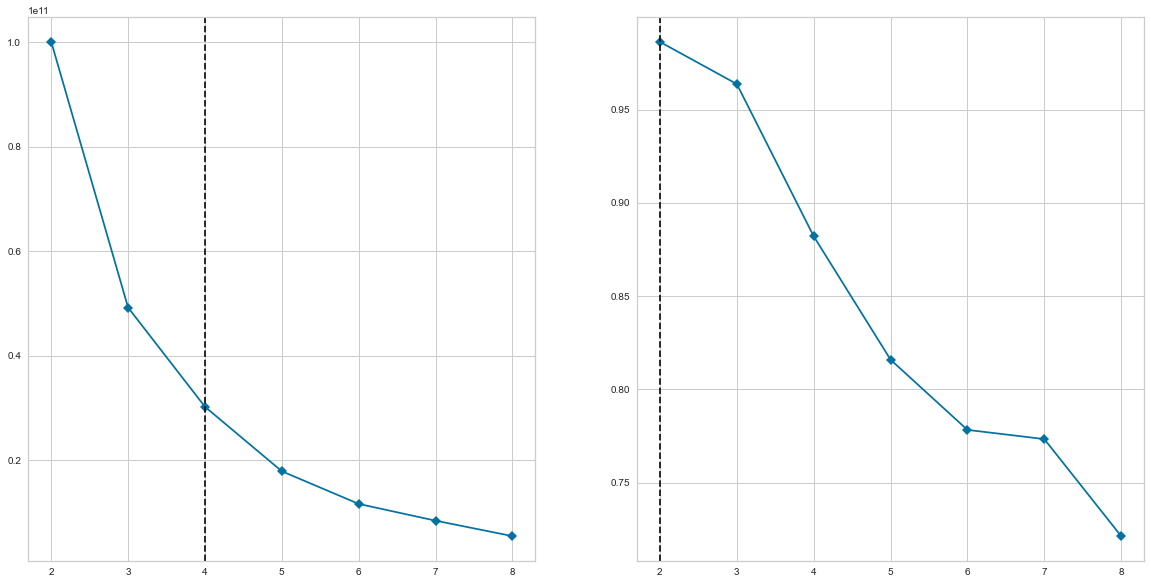

In [78]:
plt.subplot(1,2,1)
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False, metric='distortion')
kmeans.fit(X)


plt.subplot(1,2,2)
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False, metric='silhouette')
kmeans.fit(X)
plt.gcf().set_size_inches(20,10)
plt.show()

In [60]:
## 7.1 Silhouette Analysis

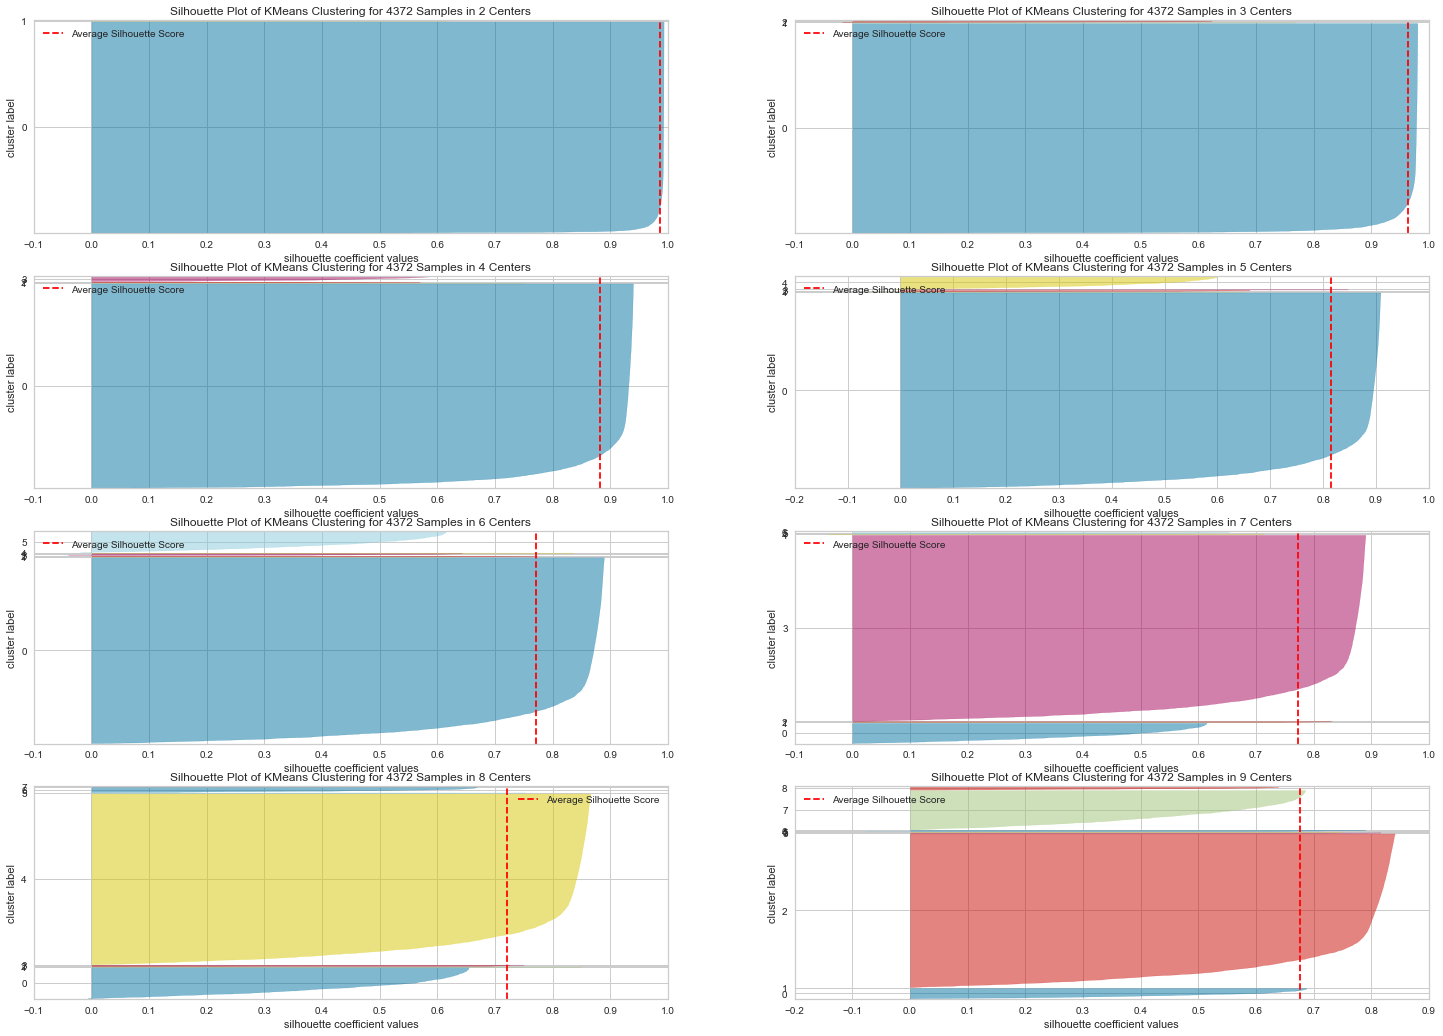

In [81]:
fig, ax = plt.subplots( 4, 2, figsize=(25, 18))

for k in clusters:
    km = c.KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    vis_silhouette = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    vis_silhouette.fit(X)
    vis_silhouette.finalize()

# 8.0 Model training

## 8.1 K-Means

In [28]:
# model definition
k=3
kmeans = c.KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=300, random_state=42)

#model training
kmeans.fit(X)
labels = kmeans.labels_


## 8.2 Cluster Validation

In [29]:
## WSS
print(f"WSS {kmeans.inertia_}")
m.silhouette_score(X,labels,metric='euclidean')

WSS 49223066368.40084


0.9630669734654459

# 9.0 Cluster Analysis

## 9.1 Visualization Inspection

In [30]:
df9=df6.copy()
df9['cluster']=labels
df9.head(1)

,customerid,grossrevenue,recencydays,invoiceno,cluster
0,17850,5288.63,302,35,0


In [31]:
fig = px.scatter_3d( df9, x='recencydays', y='invoiceno', z='grossrevenue', color='cluster')
fig.show()

## 9.2 Cluster Profile

In [32]:
# Number of customer
df_cluster=df9[['customerid','cluster']].groupby('cluster').count().reset_index()
df_cluster['pc_customer']=100*df_cluster['customerid']/df_cluster['customerid'].sum()

# Avg Gross Revenue
df_avg_gross_revenue= df9[['grossrevenue','cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster= df_cluster.merge( df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recencydays= df9[['recencydays','cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster= df_cluster.merge( df_avg_recencydays, how='inner', on='cluster')


# Avg invoice_no
df_avg_invoiceno= df9[['invoiceno','cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster= df_cluster.merge( df_avg_invoiceno, how='inner', on='cluster')


df_cluster

,cluster,customerid,pc_customer,grossrevenue,recencydays,invoiceno
0,0,4346,99.405306,1434.198064,92.088127,4.720433
1,1,3,0.068618,241136.560000,3.000000,64.666667
2,2,23,0.526075,58418.754348,7.347826,64.391304


### Cluster 0: (Low value, high frequency)
Buys at a very long period, at low quantities and values

### Cluster 1: (Insiders Candidates)
Buys at a very short period, at high quantities and values

### Cluster 2: (Medium value, Medium frequency)
Buys at a medium period, at high quantities and medium values